<a href="https://colab.research.google.com/github/analyticswithharry/RegressionAnalysisUsingPython/blob/main/Quantile_loss_in_HistGradientBoostingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantile loss in HistGradientBoostingRegressor**

# Quantile Loss in `HistGradientBoostingRegressor`

Quantile loss, also known as **Quantile Regression**, is a loss function used in regression problems where instead of predicting the mean (as in traditional regression), the model predicts a specified quantile of the target distribution.

In **`HistGradientBoostingRegressor`**, the quantile loss function allows you to predict any quantile (e.g., the median, the 90th percentile) of the target variable, instead of just the expected value. The quantile loss function can be used for predicting confidence intervals for the target variable, which helps in understanding the uncertainty in predictions.

## Formula for Quantile Loss:

Given a target value $ y_i $ and a predicted value $ \hat{y}_i $, for a quantile $ q $ (where $ 0 < q < 1 $):

- If the predicted value is lower than the actual value, the loss is scaled by the quantile $ q $.
- If the predicted value is higher than the actual value, the loss is scaled by $ (1 - q) $.

The quantile loss is computed as:

$
L(y_i, \hat{y}_i) =
\begin{cases}
q \cdot (y_i - \hat{y}_i) & \text{if } y_i \geq \hat{y}_i \\
(1 - q) \cdot (\hat{y}_i - y_i) & \text{if } y_i < \hat{y}_i
\end{cases}
$

For a dataset with multiple samples, the total quantile loss is the sum of individual losses over all samples.

## When to Use Quantile Loss:

### 1. Predicting Quantiles:
   - If you want to predict specific percentiles or quantiles, such as the median (50th percentile), 90th percentile, or any other quantile, instead of just the mean or expected value.

### 2. Uncertainty Estimation:
   - Quantile regression is useful when you need to understand the range of possible outcomes. For example, in financial modeling or risk analysis, you might want to know not just the most likely prediction but also the upper and lower bounds (e.g., the 10th and 90th percentiles).

### 3. Handling Skewed Distributions:
   - If your target variable has a skewed distribution, using quantile loss helps in giving more robust predictions in regions where data density is high or low, depending on the quantile selected.

### 4. Robustness to Outliers:
   - Since quantile regression does not focus on minimizing the squared errors, it is less sensitive to outliers. This is especially useful in cases where you have data with extreme values that would typically skew a model trained with mean squared error (MSE).


### HEMANT THAPA



In [1]:
# loading libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# collecting data from api
start_date = '2010-01-01'
end_date = '2024-11-06'
X = yf.download('AAPL', start=start_date, end=end_date)
y = yf.download('MSFT', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# data frame
data = pd.DataFrame({'X': X['Adj Close'].values.flatten(), 'y': y['Adj Close'].values.flatten()})

In [4]:
# top five columns
data[:5]

,X,y
0,6.454505,23.347321
1,6.465664,23.354868
2,6.362819,23.211536
3,6.351058,22.970140
4,6.393281,23.128557


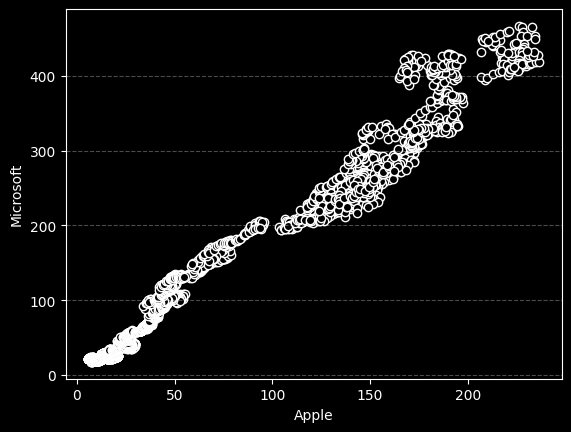

In [5]:
# scatter plot for apple vs microsoft
plt.style.use('dark_background')
plt.scatter(data['X'], data['y'], color='black', edgecolors='white')
plt.xlabel('Apple')
plt.ylabel('Microsoft')
plt.grid(True, axis='y', linestyle='--', alpha=0.3, color='white')
plt.show()

In [6]:
# quantiles for regression
quantiles = [0.95, 0.50, 0.05]

# HistGradientBoostingRegressor
parameters = dict(loss="quantile", max_bins=32, max_iter=100, random_state=42)

# fitting HistGradientBoostingRegressor for each quantile
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(**parameters, quantile=quantile).fit(data[['X']], data['y'])
    for quantile in quantiles
}

# predictions and evaluation metrics for each quantile
evaluation_results = {}

for quantile, model in hist_quantiles.items():
    # make predictions for the entire data
    y_pred = model.predict(data[['X']])

    # evaluation metrics
    mse = mean_squared_error(data['y'], y_pred)
    mae = mean_absolute_error(data['y'], y_pred)
    r2 = r2_score(data['y'], y_pred)
    evaluation_results[quantile] = {'MSE': mse, 'MAE': mae, 'R2': r2}

In [7]:
# evaluation results
for quantile, metrics in evaluation_results.items():
    print(f"Evaluation for {quantile}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R²: {metrics['R2']:.4f}")
    print()

Evaluation for quantile=0.95:
  MSE: 1347.4011
  MAE: 23.9555
  R²: 0.9100

Evaluation for quantile=0.50:
  MSE: 327.7093
  MAE: 9.9258
  R²: 0.9781

Evaluation for quantile=0.05:
  MSE: 807.0863
  MAE: 17.3638
  R²: 0.9461



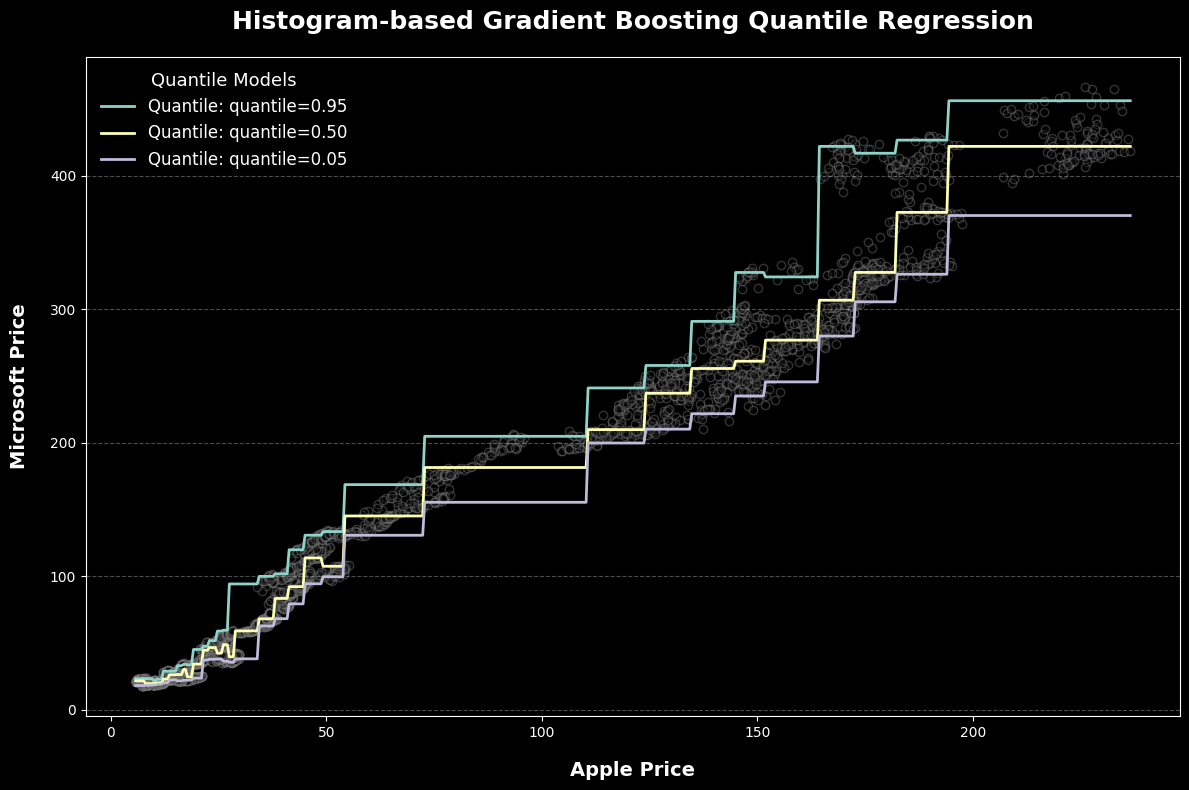

In [8]:
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.scatter(data['X'], data['y'], alpha=0.4, color='black', marker='o', edgecolors='grey')
X_plot = np.linspace(data['X'].min(), data['X'].max(), 500).reshape(-1, 1)
for quantile, hist in hist_quantiles.items():
    y_pred = hist.predict(X_plot)
    plt.plot(X_plot, y_pred, label=f'Quantile: {quantile}', linewidth=2)
plt.title('Histogram-based Gradient Boosting Quantile Regression', fontsize=18, weight='bold', color='white', pad=20)
plt.xlabel('Apple Price', fontsize=14, weight='bold', color='white', labelpad=15)
plt.ylabel('Microsoft Price', fontsize=14, weight='bold', color='white', labelpad=15)
plt.legend(loc='upper left', fontsize=12, title='Quantile Models', title_fontsize='13', frameon=False, facecolor='black', edgecolor='white')
plt.grid(True, axis='y', linestyle='--', alpha=0.3, color='white')
plt.tight_layout()
plt.show()

In [9]:
new_data = np.array([50, 150, 200])
new_data_series = pd.Series(new_data)
data = new_data_series.values.reshape(-1, 1)

# predicting using each model (quantile regression)
new_predictions = {}
for quantile, hist in hist_quantiles.items():
    new_predictions[quantile] = hist.predict(data)

# predicted values
for quantile, prediction in new_predictions.items():
    print(f"Prediction for {quantile}: {prediction}")

Prediction for quantile=0.95: [133.52229573 327.62577023 456.25125738]
Prediction for quantile=0.50: [107.55049609 261.1347418  422.06207062]
Prediction for quantile=0.05: [ 99.71438933 235.09932395 370.27451021]
